In [13]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.spatial
import sklearn.metrics

In [14]:
from deepface.commons import functions

In [15]:
model = cv2.dnn.readNetFromCaffe("sphereface_deploy.prototxt.txt", "sphereface_model.caffemodel")

In [16]:
input_shape = (112, 96)

In [17]:
img1_path = 'C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/D1_a.png'
img2_path = 'C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/D1_b.png'

In [18]:
target_size = input_shape

In [19]:
img1 = functions.preprocess_face(img1_path,target_size = target_size,align=True)
img2 = functions.preprocess_face(img2_path,target_size = target_size,align=True)

In [20]:
img1.shape

(1, 112, 96, 3)

In [21]:
list_dir = os.listdir('C:/Users/Public/Documents/DIN_Image/MorphDatabase/1_1/')

In [11]:
list_dir

['030380_0M64.JPG',
 '030380_1M64.JPG',
 '034295_0M54.JPG',
 '034295_1M54.JPG',
 '035143_0M56.JPG',
 '035143_1M56.JPG',
 '035557_01M53.JPG',
 '035557_02M54.JPG',
 '037372_02M54.JPG',
 '037372_1M52.JPG',
 '038292_02M57.JPG',
 '038292_0M54.JPG',
 '038566_0M55.JPG',
 '038566_1M56.JPG',
 '038836_0M52.JPG',
 '038836_1M53.JPG',
 '041985_0M49.JPG',
 '041985_1M50.JPG',
 '042432_0M52.JPG',
 '042432_1M53.JPG',
 '042778_00M52.JPG',
 '042778_01M53.JPG',
 '045501_00M48.JPG',
 '045501_01M49.JPG',
 '045556_00M55.JPG',
 '045556_02M55.JPG',
 '046095_0M45.JPG',
 '046095_1M47.JPG',
 '046666_02M51.JPG',
 '046666_03M51.JPG',
 '046770_2M45.JPG',
 '046770_4M45.JPG',
 '046925_00M50.JPG',
 '046925_01M50.JPG',
 '046970_0M46.JPG',
 '046970_1M47.JPG',
 '047373_0M46.JPG',
 '047373_1M46.JPG',
 '048703_0M45.JPG',
 '048703_6M47.JPG',
 '049193_03M56.JPG',
 '049193_2M54.JPG',
 '049268_0M47.JPG',
 '049268_1M47.JPG',
 '049679_03M48.JPG',
 '049679_04M48.JPG',
 '049754_0M46.JPG',
 '049754_1M46.JPG',
 '050405_0M45.JPG',
 '0

In [62]:
img1_blob = cv2.dnn.blobFromImage(img1[0])
img2_blob = cv2.dnn.blobFromImage(img2[0])

In [54]:
model.setInput(img1_blob)
img1_embedding = model.forward()

model.setInput(img2_blob)
img2_embedding = model.forward()

<ipython-input-58-18814911ec07>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


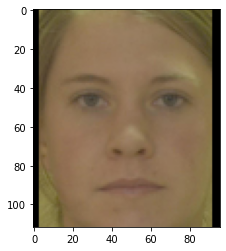

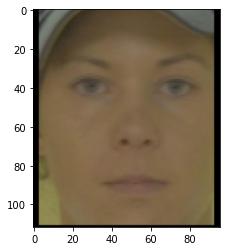

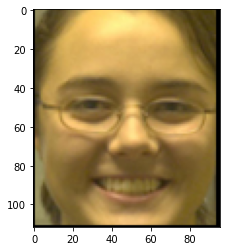

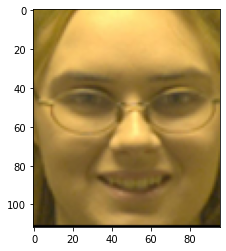

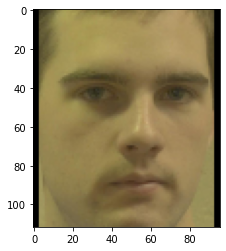

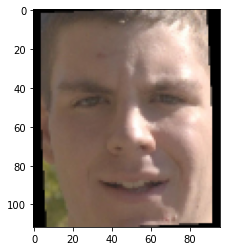

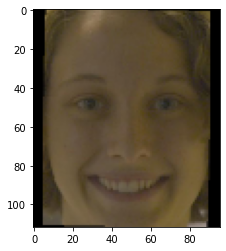

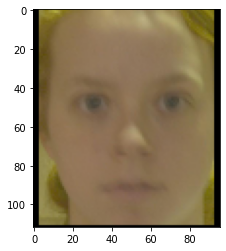

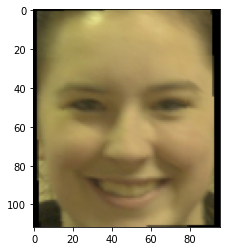

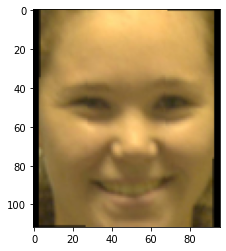

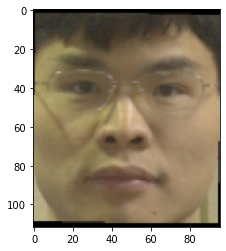

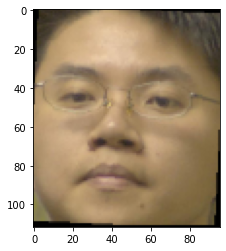

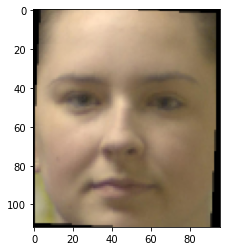

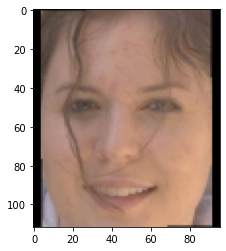

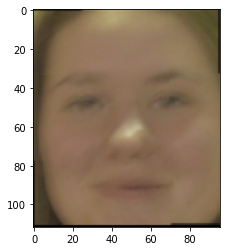

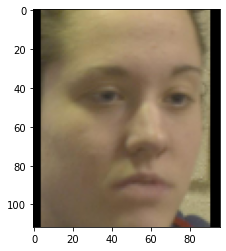

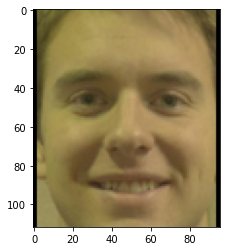

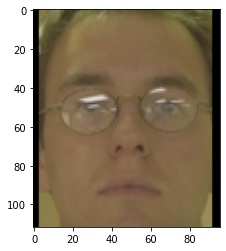

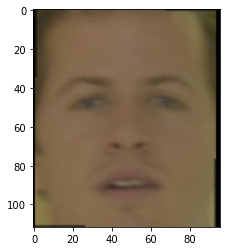

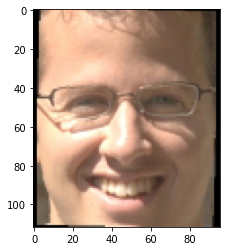

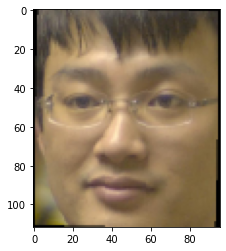

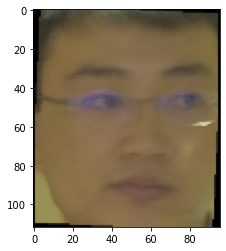

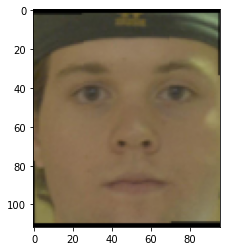

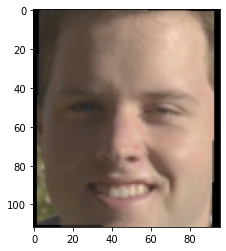

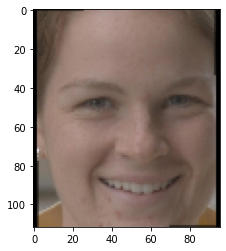

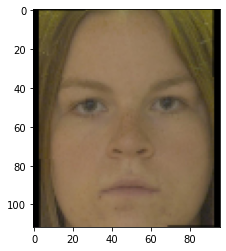

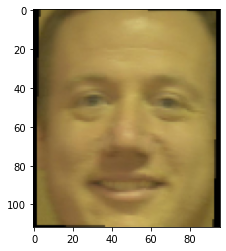

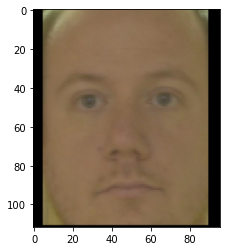

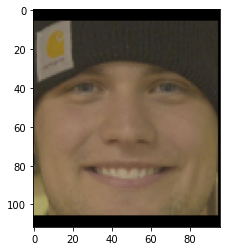

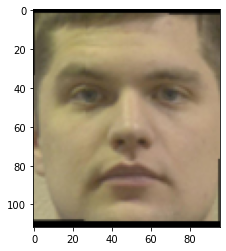

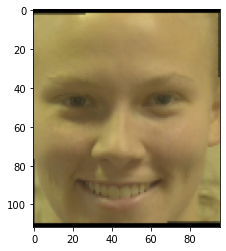

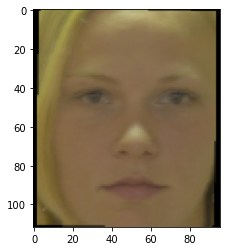

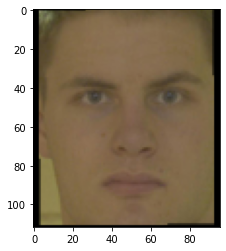

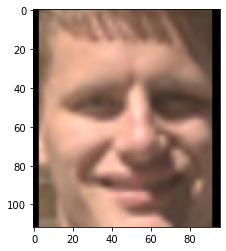

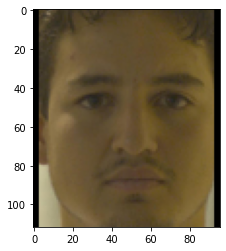

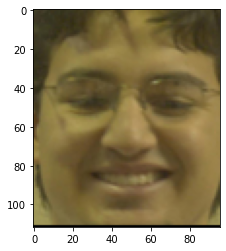

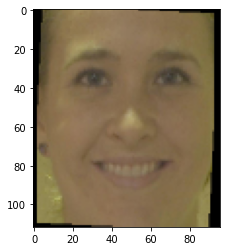

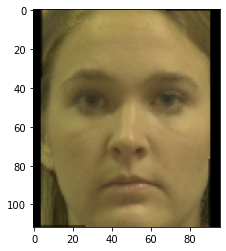

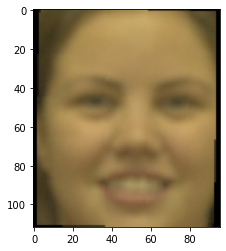

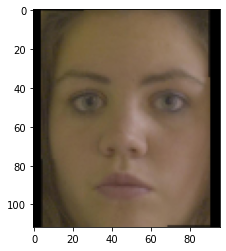

In [58]:
for i in range(len(list_dir)):
    if list_dir[0] == '.ipynb_checkpoints':
        list_dir = list_dir[1:]
    img1_path = 'C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/' + list_dir[i]
    var = functions.preprocess_face(img1_path,target_size = target_size,align=True,detector_backend='mtcnn')
    plt.figure()
    plt.imshow(var[0][:,:,::-1])
    plt.show

In [22]:
feature_vectors = []
for i in range(len(list_dir)):
    img1_path = 'C:/Users/Public/Documents/DIN_Image/MorphDatabase/1_1/' + list_dir[i]
    var = DeepFace.represent(img1_path,model_name = 'ArcFace', enforce_detection = False,detector_backend='mtcnn')
    feature_vectors.append(var)

NameError: name 'DeepFace' is not defined

### Save feature vector cvs

In [ ]:
np.savetxt('C:/Users/Public/Documents/Deep_Learner_DIN_Project/Algorithms/Feature_Vector_Extraction/MorphDatabase/1_1/' + 'Deepface_' + 'Sphere_Face' + '_Euclidean_Distance.csv', feature_vectors, delimiter = ',')

list_dir = pd.DataFrame(list_dir)

list_dir = list_dir.rename(columns = {0:'list_of_images'})

list_dir.to_csv('C:/Users/Public/Documents/Deep_Learner_DIN_Project/Algorithms/Feature_Vector_Extraction/MorphDatabase/1_1/' + 'list_of_images.csv')

In [59]:
euclidean_distances = []
for i in range(0,40,2):
    var1 = scipy.spatial.distance.euclidean(feature_vectors[i],feature_vectors[i+1])
    euclidean_distances.append(var1)

NameError: name 'feature_vectors' is not defined

In [52]:
euclidean_distances

<function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>

In [40]:
from sklearn.metrics.pairwise import euclidean_distances

In [41]:
distance = euclidean_distances(img1_embedding,img2_embedding)[0,0]

In [42]:
threshold = 0.60

In [43]:
distance

17.472908

In [49]:
ground_truth = []

for i in range(8):
    ground_truth.append('different') 

for i in range(12):
    ground_truth.append('same')

In [50]:
fpr,tpr,thresholds = sklearn.metrics.roc_curve(ground_truth,np.array(euclidean_distances),pos_label='same')

TypeError: Singleton array array(<function euclidean_distances at 0x000001DAB7917EE0>, dtype=object) cannot be considered a valid collection.

In [51]:
sklearn.metrics.auc(fpr, tpr)

NameError: name 'fpr' is not defined